# Final Report:

## Problem Statement:

## Steps Overview:

We have to main steps to reach our goal to have a good representation of all the usecases:
- Document Parsing:
in this step our main goal is to get all possible information out from the usecases document, and this is done by:
    - Usecases' Requirments Parsing.
    - Usecases' Figures Parseing.
- Graph database representation:
Here after we have a clear representation of each usecases, we want to represent each actor and its relationship with the other actors, and for here we used `neo4j` Graph database and its querying langauage `Cypher` to represent all actors.

## Document Parsing:

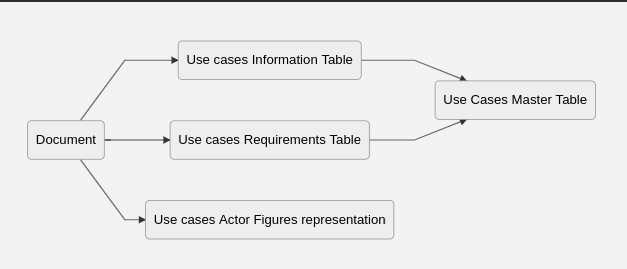

## 1- Usecases table Parsing:

For each use case in our document we have 2 main blocks to parse, the first one is the use case table that contains all the details about the use case itself, and as an example of the table we have:

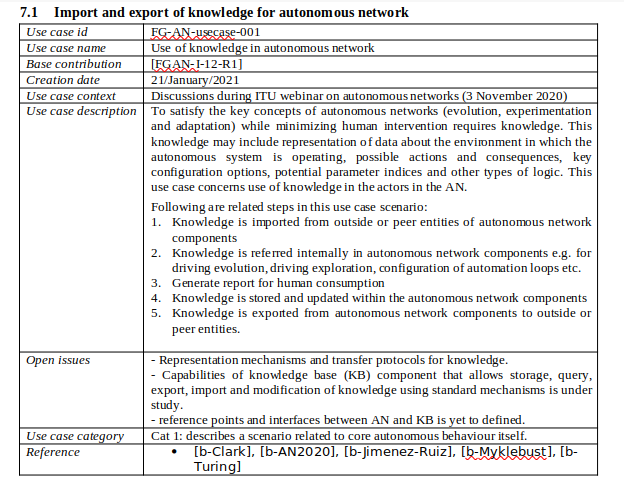

First, we have to be sure that we are selecting this kind of tables, not other kinds, as in the document we have a lot of tables, so as a pattern we have found that, to parse this part from the document, we need to make a condition on the first row, because we have found that, all use cases tables has:
- `Use case id` in the first cell on the left.

So by making a condition on that, we will parse only this kind of tables.

### 1.1 Problems we have faced:

- Not all tables are consistant in represting the infromation as after we parsed it all, we have found some columns have different names but with the same kind of information, so before preprocessing we found these columns:
`['Use case id', 'Use case name', 'Base contribution', 'Creation date',
 'Use case context', 'Use case description', 'Open issues',
 'Use case category', 'Reference', 'Description', 'Category',
 'Open issues (as seen by the proponent)', 'Notes on use case category',
 'Notes on priority of the use case', 'Base Contribution',
 'Use case description\n', 'References', 'Created by', 'Mentor',
 'Base contributions']`

But after preprocessing we have found:
` ['Use case id', 'Use case name', 'Base contribution', 'Creation date',
   'Use case context', 'Use case description', 'Open issues',
   'Use case category', 'Reference', 'Notes on priority of the use case']`
   
And as a suggestion to avoid this kind of information we need to define a specific fields to be consistent in naming in the future versions.

- Not all information are avialable for all the use cases, so we need to make sure we have included all information in the future versions of document. 


As a result from here have table will be like:

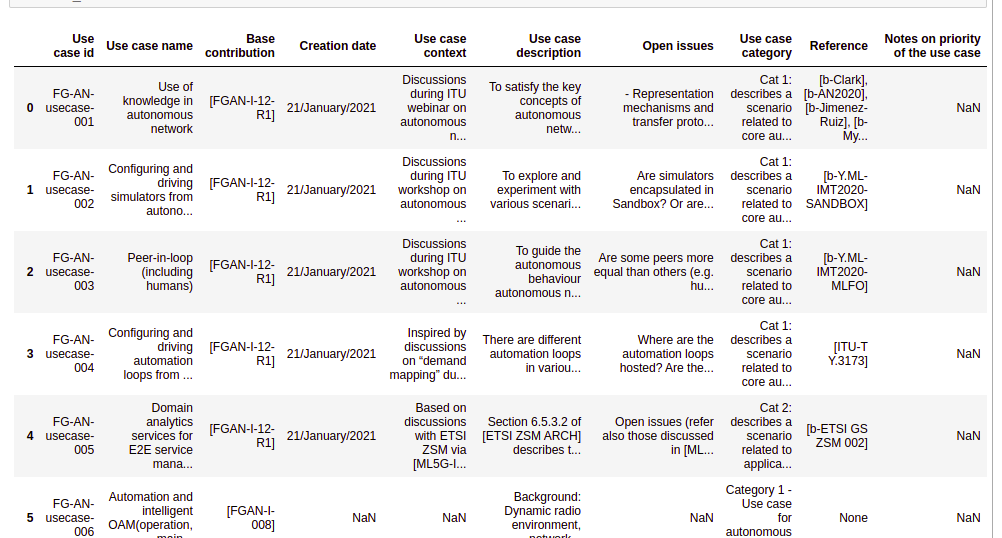

### 2- Requierments parsing:

Here the next part is to find the requiements for each usecase, by parsing all paragraphs, as we can find the requiements in following form:

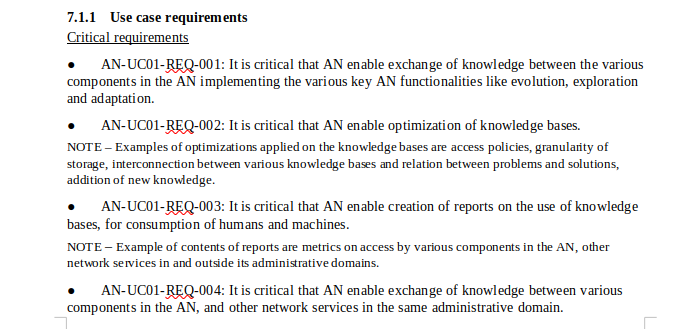

So to find the requirements, we need to make a condition in the text in each paragraph to contain `REQ`, to make sure that we are parsing a requirements, and as a pattern we have noticed that each requirement contains:

- The use case ID after the first `-`.
- The requirment number after the last `-`.
- The requirment if its `critical`, `optional` or `added value` after the words `It is` in the requiement descritption.

So all information about parsing the requirments can be parsed easily from body of the text by some string preprocessing.

### 1.2.1 Problems we faced:

Be careful when making string preprocessing as we have found some problems that made us to edit the code of parsing.

Here we have another table like this:

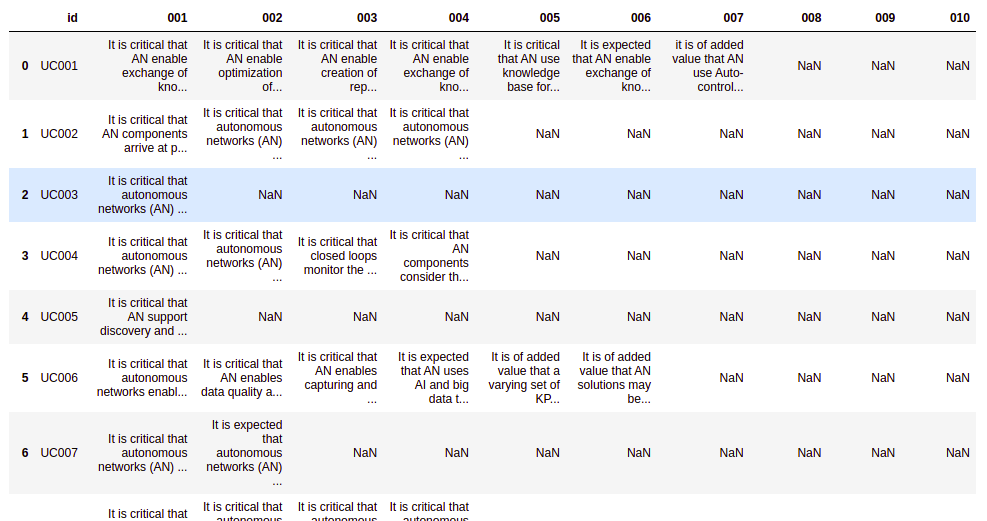

### 3- Joining:

Now we have two separated tables, one for the details of the usecase, and the other for the requirements for every use case, so we need to join them to have one row for each use case that has the information about the use case and its requirements in one table, to do that, we have created a column in both tables called `id` and joining both tables on that id.

So finally we managed to join these two tables together.

## 2- Figures Parsing:

Use cases diagrams in the document are represented by images as in the following image, and images are not parsable, so first of all we need to change its format to be a parasable format, to do so we have tried several approaches and tools, and making some customizations to be suitable for our problem.


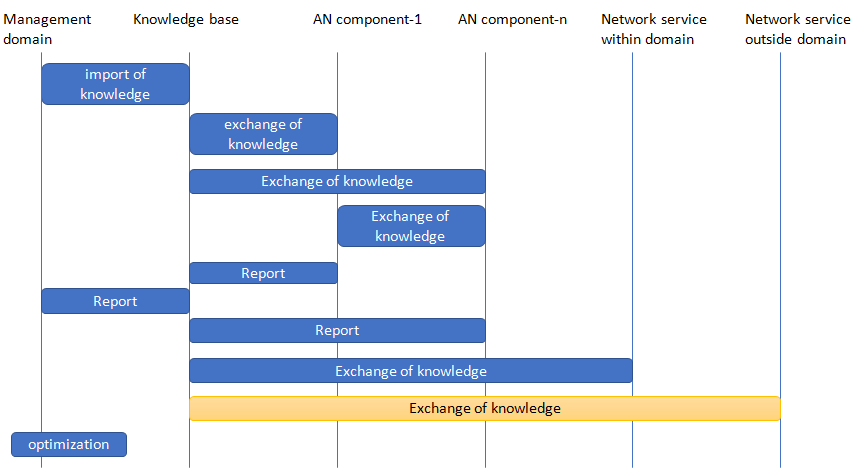


### 2.1 Representation approaches:

1. <b>PlantUML Tool sequence diagrams:</b>

We have tried PlantUML[1] tool to represent the figures as sequence diagrams and the figures will by in a UML code that we can parse it later by using different approaches, the resulting representation of the first try was:

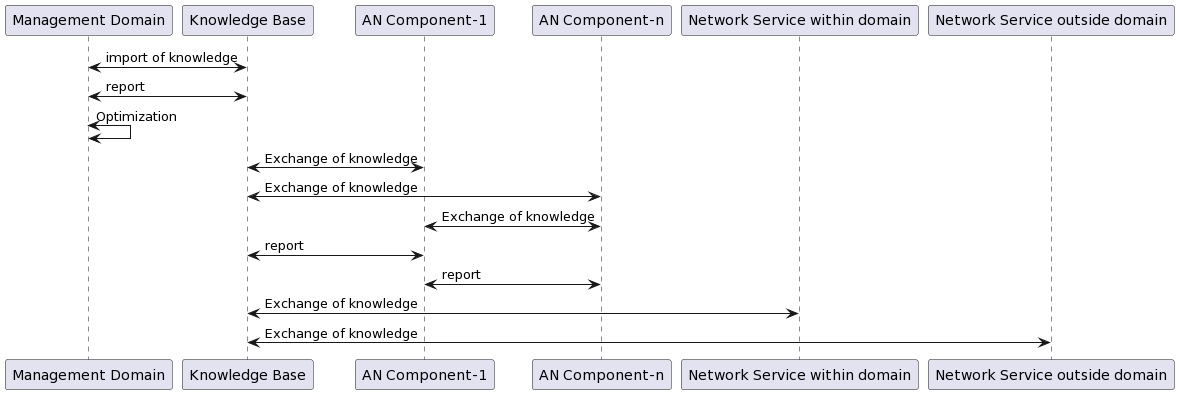

###### Pros:
- Easy to represent figures.
- Can be simple in parsing without the need of libraries by using string preprocessing methods.
- Represent the Bi-directional relationships very well.

###### Cons:
- Cannot represent functions of the components, we have tried to represent them as self messages but this is not sufficient.

2. <b>PlanUML Block diagrams:</b>

Here also we have tried to make use of PlantUML tool to represent figures, the result diagram was as follows:

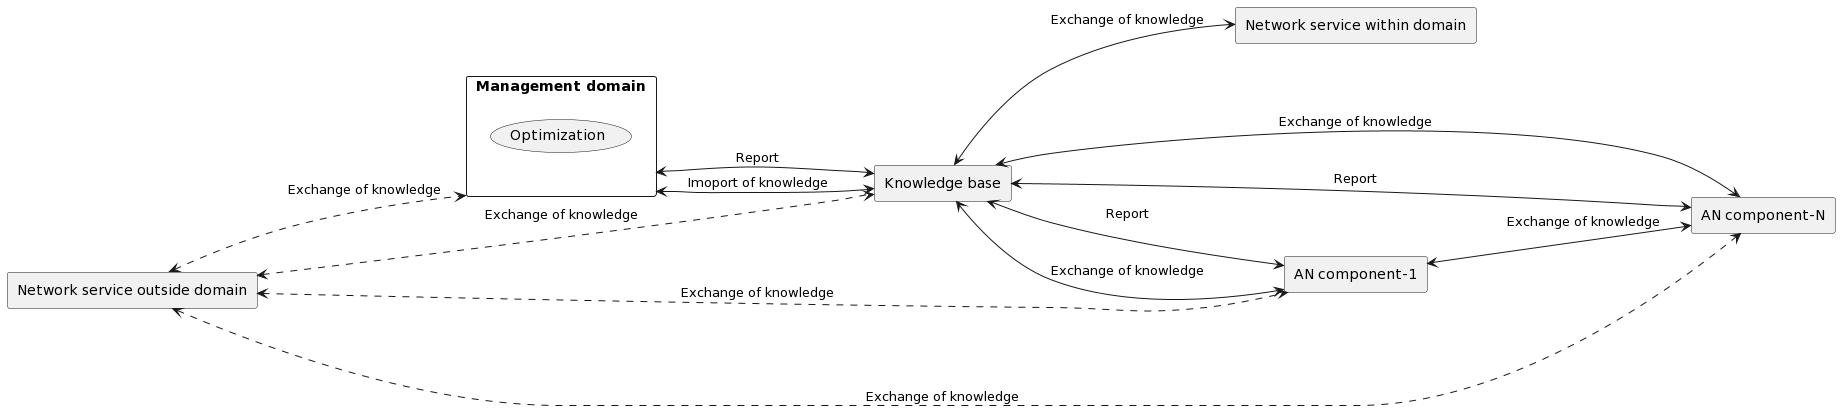

###### Pros:
- Solvd the problem of functions.

###### Cons:
- Added some complexities to the representation but it it managable.
- Not suffecient representation.

3. <b>Draw.io :</b>

Here we tried to represent the figures using the Draw.io[2] tool, then by downloading the resulting file in XML[3] format, then parsing this XML to extract the figures' information, the resulting representation was as follows:

###### Pros:
- Able to add many customization we want.
- Able to represent as many types of figures and shapes we want.
- Able to solve the problem of functions.

###### Cons:
- Add more extra complexties in implementation and parsing.

### 2.1 Actor representation details:

1. We need to link all components together graphically.
2. We need to add some metadata this is done by pressing ctrl+m and add some properties according to what object we want to represent, as follows:
      - For Components we add:
          - `value` property and assign the name of the component as a value of this preperty.
          - `class` property and assign "component" as a value just to mark it as a component.
      - For Functions we add:
          - `value` property and assign the name of the function.
          - `class` property and assign "function" as a value just to mark it as a function.
          - `parent` property and assign the id of the parent component.
      - For Relationships we add:
          - `value` property and add the message.
          - `class` property and assign the type of relationship whether it was: `critical`, `optional`.
          - `direction` property and assign if its `two-way` relationship or `one-way` relation.
3. We need to same this as xml file and name the file by the id for the usecase, i.e. the third usecase has the name of `UC003.xml`.

###### Parsing details:
1. Parsing components: we parse the components and store them in a dictionary that maps between the ID and name.
2. Parsing relations: and get the source and target components ID and then getting the names from the previuos dictionary, and also getting other preperties we need.

After parsing we have the following table:

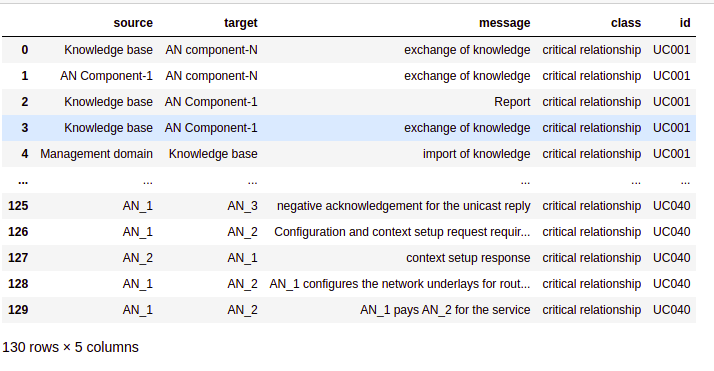
